In [1]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [2]:
import pandas as pd
df = pd.read_csv('Social_Network_Ads.csv')
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


Pré-processamento de Dados:

Elementos Faltantes: Preencha ou remova quaisquer elementos faltantes na base de dados (caso existam).

Variáveis Categóricas: Se houver variáveis categóricas, transforme-as em variáveis numéricas.

Normalização: Normalize as variáveis se necessário.

Separação de Dados: Divida a base em conjuntos de treino e teste

In [3]:
df.isnull().sum()
#Checando Valores nulos, e chegando a conclusão que não possui nenhum.

# Convertendo a variável categórica 'Gender' para numérica
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [4]:
# Separando as variáveis de entrada (YearsExperience) e saída (Salary)
X = df[['Gender','Age','EstimatedSalary']]
y = df['Purchased']

scaler = preprocessing.StandardScaler()

X_standardized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2)



Modelagem e Treino:

Utilize a base de treino para criar e treinar um modelo de regressão logística usando a scikit-learn.

A regressão logística estima a probabilidade de ocorrência de um evento, como um voto, com base em um determinado conjunto de dados de variáveis independentes.

In [5]:
# Criando e treinando um modelo de Regressão Logística
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = logistic_regression.predict(X_test)



Precisão (proporção de instâncias classificadas corretamente como positivas entre todas as instâncias classificadas como positivas)
Recall (proporção de instâncias positivas corretamente classificadas entre todas as instâncias reais positivas), a F1-score (média harmônica entre precisão e recall)
Acurácia (proporção de instâncias classificadas corretamente em relação a todas as instâncias).

In [6]:
# Avaliando o modelo na base de teste
accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred)


print(f"Acurácia: {accuracy_test}")
print(f"Precisão: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1-score: {f1_test}")

Acurácia: 0.8
Precisão: 0.6538461538461539
Recall: 0.7083333333333334
F1-score: 0.68


A curva ROC é útil para avaliar o desempenho do modelo em diferentes pontos de corte de probabilidade, e a área sob a curva (AUC) fornece uma medida agregada da qualidade do modelo.

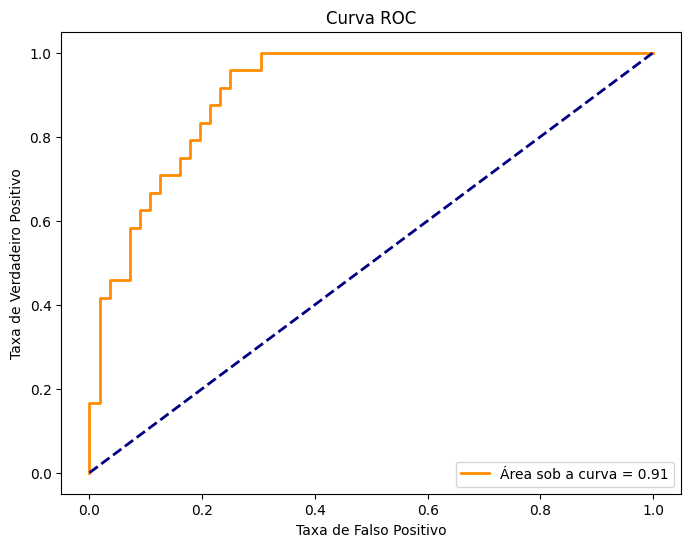

In [7]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Área sob a curva = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()